# The deflection angle of a point mass

For a point mass, we obtained:
$$\hat\alpha=\frac{4G}{c^2}\frac{M}{b}$$

Let's apply this equation to the case of a photon passing by the sun with an impact parameter $b$:

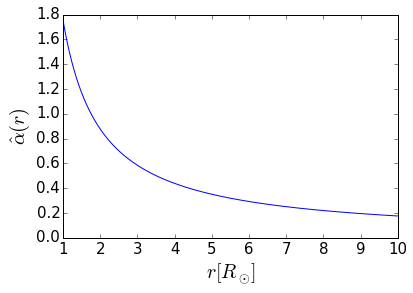

In [1]:
%matplotlib inline
import numpy as np
from astropy import constants as const

mass=1.0*const.M_sun.value
radius=1.0*const.R_sun.value

def alpha(mass,radius):
    G=const.G.value
    c=const.c.value
    arcsec=180.0/np.pi*3600.0
    return 4.0*G*mass/c**2/radius*arcsec

r=np.linspace(1.0,10.0,1000)*radius
alpha=alpha(mass,r)

import matplotlib.pyplot as plt

plt.plot(r/radius,alpha,'-')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel(r'$r [R_\odot]$',fontsize=20)
plt.ylabel('$\\hat\\alpha(r)$',fontsize=20)

The plot shows how the deflection angle decreases as a function of the impact parameter, which is here expressed in units of the solar radius.



# Lensing potential

The lensing potential is defined as

$$ \hat\Psi=\frac{D_{LS}}{D_L D_S}\frac{2}{c^2}\int\Phi dz$$

The distance factor in front of the formula modulates the potential:

/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/astropy/units/quantity.py:822: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

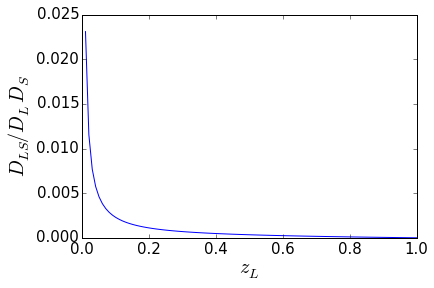

In [3]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
zl=np.linspace(0.0,1.0,100)
zs=1.0
dl=cosmo.angular_diameter_distance(zl)
ds=cosmo.angular_diameter_distance(zs)
dls=[]
for i in range(dl.size):
    dls.append(cosmo.angular_diameter_distance_z1z2(zl[i],zs).value)
plt.plot(zl,dls/ds/dl,'-')
plt.ylabel('$D_{LS}/D_L D_S$',fontsize=20)
plt.xlabel('$z_L$',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

The plot shows that the scaling factor in front of the lensing potential tends to zero for $z_L$ appraching $z_S$. When the lens is moved too close to the sources, the photons do not see any effective potential.

(array([ 0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 9 Text xticklabel objects>)

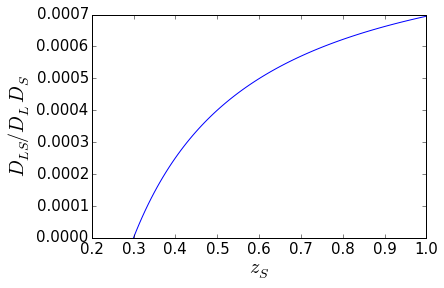

In [4]:
zl=0.3
zs=np.linspace(zl,1.0,100)
dl=cosmo.angular_diameter_distance(zl)
ds=cosmo.angular_diameter_distance(zs)
dls=[]
for i in range(ds.size):
    dls.append(cosmo.angular_diameter_distance_z1z2(zl,zs[i]).value)
plt.plot(zs,dls/ds/dl,'-')
plt.ylabel('$D_{LS}/D_L D_S$',fontsize=20)
plt.xlabel('$z_S$',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

For a fixed lens redshift, the effective lensing potential grows as a function of the source redshift. This suggests that gravitational lenses are more effective at lensing distant sources.